In [211]:
from sklearn.datasets import load_digits

In [212]:
# load dataset from sklearn 
digits = load_digits()

In [214]:
digits.data.shape

(1797, 64)

In [215]:
digits.target.shape

(1797,)

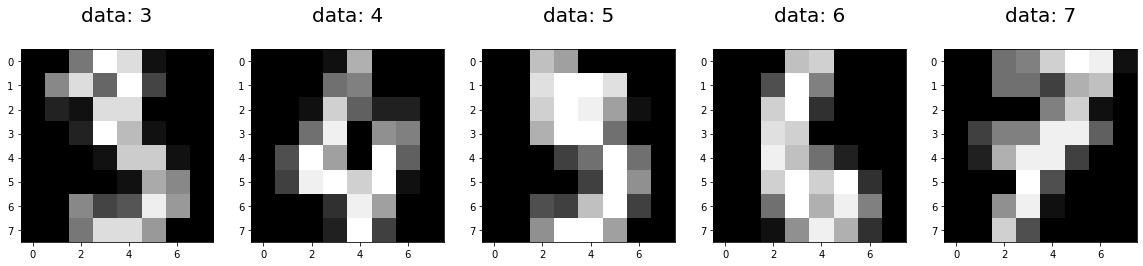

In [217]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20,4))

for index, (image, label) in enumerate(zip(digits.data[3:8], digits.target[3:8])):
    plt.subplot(1, 5, index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('data: %i\n'%label, fontsize = 20)

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size= 0.3, random_state=0)

In [243]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs')
logistic.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [221]:
logistic.predict(x_test[0].reshape(1,-1))

array([2])

In [224]:
x_test.shape

(540, 64)

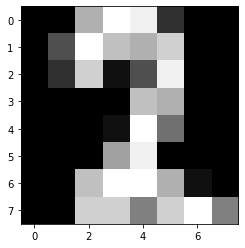

In [231]:
plt.imshow(np.reshape(x_test[0], (8,8)), cmap = plt.cm.gray)

Mesure the performance by
1. Confusion Matrix

In [235]:
import seaborn as sns
from sklearn import metrics
predictions = logistic.predict(x_test)
score = logistic.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

In [236]:
print(score, '\n', cm)

0.9537037037037037 
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  2  0  3  0]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  0  1]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  1  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  0  1  1  0  0 50  0  0]
 [ 0  3  1  0  0  0  0  0 55  2]
 [ 0  0  0  1  0  1  0  0  2 53]]


Seaborn

Text(0.5, 1.0, 'Accuracy_score: 0.9537037037037037')

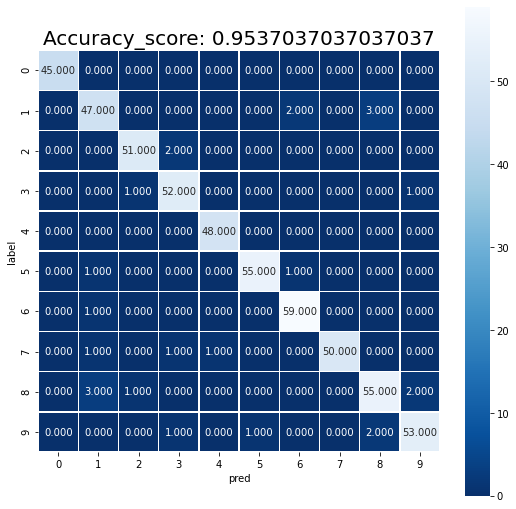

In [238]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('label')
plt.xlabel('pred')

title = 'Accuracy_score: {0}'.format(score)
plt.title(title, size=20)

Matlibplot

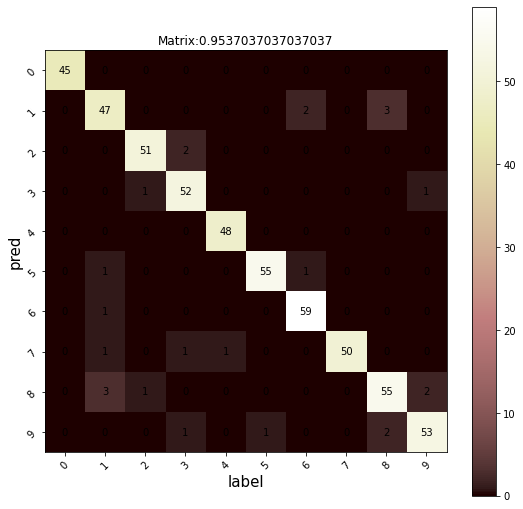

In [242]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='pink')
plt.title('Matrix:{0}'.format(score))
plt.colorbar()
axis_marks =np.arange(10)
plt.xticks(axis_marks,["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(axis_marks,["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.xlabel('label',size =15)
plt.ylabel('pred', size=15)

w,h = cm.shape
for x in range(w):
    for y in range(h):
        plt.annotate(str(cm[x][y]),xy = (y,x), 
                     horizontalalignment='center', verticalalignment='center')

# PCA

In [244]:
import pandas as pd

In [245]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])
df[0:3]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa



    loc gets rows (or columns) with particular labels from the index.
    iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
    ix usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index.


In [261]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal length','petal width','target']
x=df.loc[:, features[:4]].values
x[-2:]

array([[6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [265]:
x = StandardScaler().fit_transform(x)
x[0:2]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673]])

In [255]:
df.iloc[:2]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [256]:
df.iloc[2]

sepal length            4.7
sepal width             3.2
petal length            1.3
petal width             0.2
target          Iris-setosa
Name: 2, dtype: object

In [257]:
y = df.loc[:,['target']].values
y[-2:]

array([['Iris-virginica'],
       ['Iris-virginica']], dtype=object)

In [270]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(x)

pca_df = pd.DataFrame(data=pca_trans, columns=['p1', 'p2'])
output_df = pd.concat([pca_df, df['target']], axis = 1)
output_df

,p1,p2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


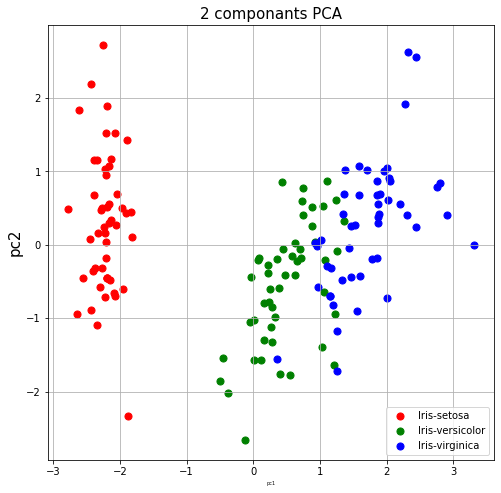

In [274]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1', fontsize= 5)
ax.set_ylabel('pc2', fontsize=15)
ax.set_title('2 componants PCA', fontsize=15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets, colors):
    indices = output_df['target'] == target
    ax.scatter(output_df.loc[indices, 'p1'],
              output_df.loc[indices, 'p2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()

In [275]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

PCA can speed up ML algorithm

In [276]:
from sklearn.datasets import fetch_openml

In [277]:
mnist = fetch_openml('mnist_784')

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(mnist.data, mnist.target, test_size = 0.3, random_state = 0)

In [280]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [283]:
pca = PCA(.95)

In [284]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [289]:
pca.n_components_

323

In [285]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

Logistic regression to transform mnist data

In [286]:
logistic=LogisticRegression(solver = 'lbfgs')
logistic.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [288]:
logistic.predict(x_test[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [302]:
pca.fit(mnist.data)
pca.n_components_

154

In [293]:
lower_dim_data = pca.fit_transform(mnist.data)

In [294]:
inverse_data = pca.inverse_transform(lower_dim_data)

Text(0.5, 1.0, '.95 explained variance')

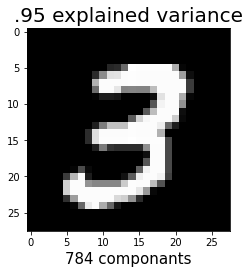

In [300]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.imshow(mnist.data[7].reshape(28,28),
          cmap=plt.cm.gray,
          interpolation='nearest',
          clim=(0,255))
plt.xlabel('784 componants',fontsize=15)
plt.title('.95 explained variance', fontsize = 20)

Text(0.5, 1.0, '.95 explained variance')

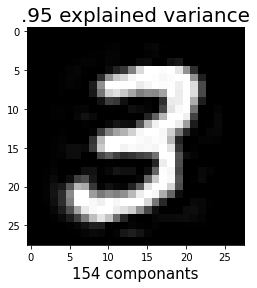

In [301]:
plt.imshow(inverse_data[7].reshape(28,28),
          cmap=plt.cm.gray,
          interpolation='nearest',
          clim=(0,255))
plt.xlabel('154 componants',fontsize=15)
plt.title('.95 explained variance', fontsize = 20)

In [305]:
tol=np.sum(pca.explained_variance_)

In [308]:
var_exp = [(i/tol)*100 for i in sorted(pca.explained_variance_, reverse=True)]
var_exp

[10.255291448436683,
 7.52927322690785,
 6.470806727523769,
 5.685678642538761,
 5.1443508782439125,
 4.530149066126025,
 3.4495308316292084,
 3.0406078358249533,
 2.9024720198805647,
 2.464502805371154,
 2.216750268878497,
 2.144003059105583,
 1.7962480732633754,
 1.7825220557287018,
 1.6661043727255953,
 1.563997418424567,
 1.3882869831279845,
 1.3458350016217564,
 1.2493002853324284,
 1.2131706610489763,
 1.1217339064533436,
 1.0625499763300355,
 1.0092610725222357,
 0.957158001609279,
 0.9294332050340748,
 0.8826413791698555,
 0.8521406004316769,
 0.8267668991394264,
 0.7789364478091572,
 0.7260632202762833,
 0.6904235408612961,
 0.6791922042198208,
 0.6322084715992079,
 0.6162064131416658,
 0.5963629997668396,
 0.5718637096143286,
 0.5310854794873695,
 0.5125263698846335,
 0.5039776424901248,
 0.4920225857056108,
 0.47810663771414547,
 0.46816228207136584,
 0.4400658821591704,
 0.41686107161403396,
 0.4037541520141714,
 0.3954172836659302,
 0.3803086181411663,
 0.36725902097281776

In [307]:
# cumulative sum from the first to the one at present
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 10.25529145,  17.78456468,  24.2553714 ,  29.94105005,
        35.08540092,  39.61554999,  43.06508082,  46.10568866,
        49.00816068,  51.47266348,  53.68941375,  55.83341681,
        57.62966488,  59.41218694,  61.07829131,  62.64228873,
        64.03057571,  65.37641072,  66.625711  ,  67.83888166,
        68.96061557,  70.02316554,  71.03242662,  71.98958462,
        72.91901782,  73.8016592 ,  74.6537998 ,  75.4805667 ,
        76.25950315,  76.98556637,  77.67598991,  78.35518212,
        78.98739059,  79.603597  ,  80.19996   ,  80.77182371,
        81.30290919,  81.81543556,  82.3194132 ,  82.81143579,
        83.28954243,  83.75770471,  84.19777059,  84.61463166,
        85.01838581,  85.4138031 ,  85.79411171,  86.16137074,
        86.51779901,  86.85419737,  87.1876051 ,  87.51395321,
        87.82592286,  88.12802362,  88.42529705,  88.70879547,
        88.99120965,  89.26112004,  89.52751438,  89.78494379,
        90.03716902,  90.28821443,  90.52942426,  90.76

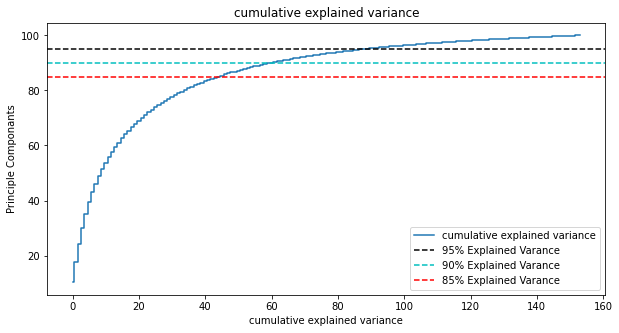

In [316]:
plt.figure(figsize=(10,5))
plt.step(range(0,154), cum_var_exp, where='mid', label='cumulative explained variance')
plt.title('cumulative explained variance')
plt.xlabel('cumulative explained variance')
plt.ylabel('Principle Componants')
plt.axhline(y=95,color='k', linestyle='--',label='95% Explained Varance')
plt.axhline(y=90,color='c', linestyle='--',label='90% Explained Varance')
plt.axhline(y=85,color='r', linestyle='--',label='85% Explained Varance')
plt.legend(loc='best')
plt.show()

In [317]:
componentsVariance = [784, 
                      np.argmax(cum_var_exp > 99) + 1, 
                      np.argmax(cum_var_exp > 95) + 1, 
                      np.argmax(cum_var_exp > 90) + 1, 
                      np.argmax(cum_var_exp >= 85) + 1]

In [318]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

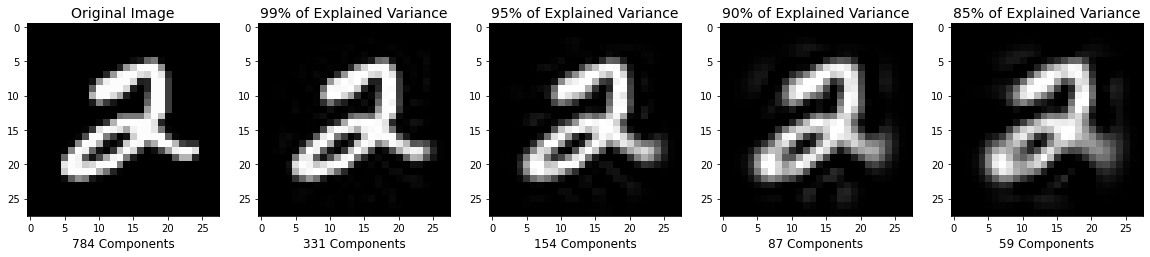

In [319]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);
